In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../../fuentes/titanic.csv')
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:

col_names = df.columns.tolist()
for column in col_names:
    print ("valores nulos en <{0}>: {1}".format(column, df[column].isnull().sum()))

valores nulos en <PassengerId>: 0
valores nulos en <Survived>: 0
valores nulos en <Pclass>: 0
valores nulos en <Name>: 0
valores nulos en <Sex>: 0
valores nulos en <Age>: 177
valores nulos en <SibSp>: 0
valores nulos en <Parch>: 0
valores nulos en <Ticket>: 0
valores nulos en <Fare>: 0
valores nulos en <Cabin>: 687
valores nulos en <Embarked>: 2


In [4]:
num = (df.dtypes == float) | (df.dtypes == int)
num

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare            True
Cabin          False
Embarked       False
dtype: bool

In [5]:
num.index

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
#creamos un diccionario con los valores originales y los valores de reemplazo
a = {"male" : "M", "female" : "F"}
#utilizamos un lambda para el reemplazo 
df["Sex"] = df["Sex"].apply(lambda x:a[x])
#verifiquemos que el cambio se haya hecho
df["Sex"].head()

0    M
1    F
2    F
3    F
4    M
Name: Sex, dtype: object

In [7]:
pclass_gender_survival_count_df = df.groupby(["Pclass", "Sex"])["Survived"].sum()
pclass_gender_survival_count_df

Pclass  Sex
1       F      91
        M      45
2       F      70
        M      17
3       F      72
        M      47
Name: Survived, dtype: int64

In [ ]:
sns.pairplot(df)

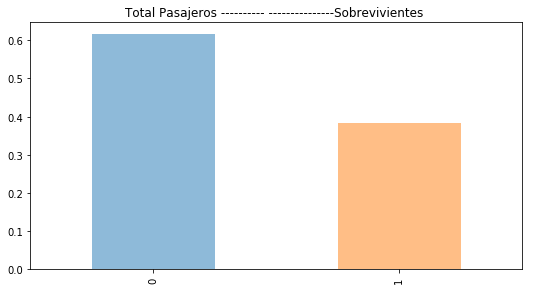

In [12]:
fig = plt.figure(figsize=(30,10)) #creamos un canva o figura de 30X10 pixeles

#hay maneras un poco más amigables de interpretar datos, con porcentajes
plt.subplot2grid((2,3),(0,0))
df.Survived.value_counts(normalize = True).plot(kind="bar", alpha=0.5)
plt.title("Total Pasajeros ---------- ---------------Sobrevivientes ")

plt.show()

##barra izquiera representa el total de pasajeros y la izquierda el nuemro de sobrevivientes

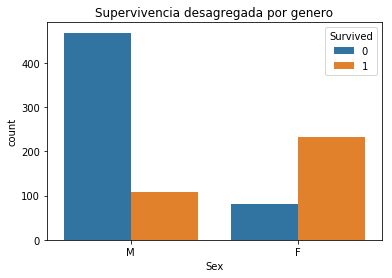

In [14]:
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title('Supervivencia desagregada por genero')
plt.show()



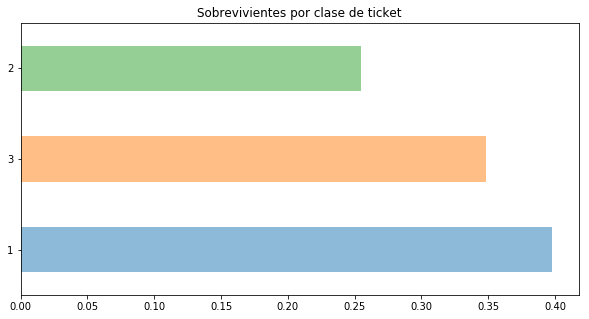

In [15]:
fig = plt.figure(figsize=(10,5))
#colors ``
df.Pclass[df.Survived == 1].value_counts(normalize = True).plot(kind="barh", alpha=0.5)
plt.title("Sobrevivientes por clase de ticket")
plt.show()

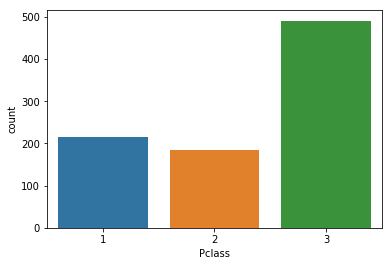

In [17]:
sns.countplot(x="Pclass", data=df)
plt.show()